<a href="https://colab.research.google.com/github/nelsonfrz/knn-breastcancer/blob/main/knn_breast_cancer_wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $k$-Nearest-Neighbors ($k$-NN) Algorithmus
Der $k$-Nearest-Neighbours-Algorithmus, auch als $k$-NN bezeichnet, ist ein nichtparametrischer, überwachter Klassifikator, der das Konzept der Nähe nutzt, um Vorhersagen über die Klasse eines
einzelnen Datenpunktes zu treffen.

## 1. Importierung der Bibliotheken und Breast Cancer Wisconsin Datensatz
Quelle des Datensatz: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## 2. Besäuberung des Datensatzes

In [4]:
# Wandle "diagnosis" in binäres Format um
df["diagnosis"] = df["diagnosis"].map({"M": 0, "B": 1})

In [5]:
# Entferne irrelevante Spalten
df.drop("id", axis=1, inplace=True)
df.dropna(axis=1, inplace=True)

## 3. Spaltung des Datensatzes in Trainings- & Testdatensätze

In [6]:
X = df.drop("diagnosis", axis=1, inplace=False)
y = df["diagnosis"].copy()

In [7]:
# 70% Training, 30% Test
train_len = round(len(X)*0.7)

X_train = X.iloc[:train_len].to_numpy()
X_test = X.iloc[train_len:].to_numpy()

y_train = y.iloc[:train_len].to_numpy()
y_test = y.iloc[train_len:].to_numpy()

## 4. Implementierung des $k$-Nearest-Neighbors Algorithmus

In [8]:
class KNeighborsClassifier:
  def __init__(self, k, p):
    """ k is the number of nearest neighbors. p is the parameter for the minkowski distance. """
    if k < 1:
      raise Exception("k must be greater than or equal to 1")

    self.k = k
    self.p = p

  def minkowski_distance(self, q, x):
    """ Calculates distance between two points q and x. """
    if len(q) != len(x):
      raise Exception("Length of q and x are not the same.")

    sum = 0
    for i in range(len(q)):
      sum += abs(q[i] - x[i]) ** self.p

    return sum ** (1 / self.p)

  def fit(self, X, y):
    """ Fit the k-nearest neighbors classifier from the training dataset X and labels y. """
    if len(X) != len(y):
      raise Exception("Length of X and y are not the same.")

    self.X = X
    self.y = y

  def predict(self, q):
    """ Predict the class label for the provided data q. """
    if len(q) != len(self.X[0]):
      raise Exception("Length of q and x are not the same.")

    distances = []
    for i in range(len(self.X)):
      distance = self.minkowski_distance(q, self.X[i])
      distances.append( (i, distance) )

    distances.sort(key=lambda distance: distance[1])
    labels = [self.y[distance[0]] for distance in distances]
    labels = labels[:self.k]

    labels_dict = {}
    max_count = 0
    most_frequent_label = None
    for label in labels:
      if label in labels_dict:
        labels_dict[label] += 1
      else:
        labels_dict[label] = 1

      if labels_dict[label] > max_count:
        max_count = labels_dict[label]
        most_frequent_label = label

    return most_frequent_label

## 5. Implementierung der Genauigkeitsfunktion

In [9]:
def accuracy_score(y_true, y_pred):
  if len(y_true) != len(y_pred):
      raise Exception("Length of y_true and y_pred are not the same.")

  sum = 0
  for i in range(len(y_true)):
    sum += 1 * (y_true[i] == y_pred[i])

  return sum / len(y_true)

## 6. Bestimmung des Parameters $k$

k=25 => 0.9590643274853801


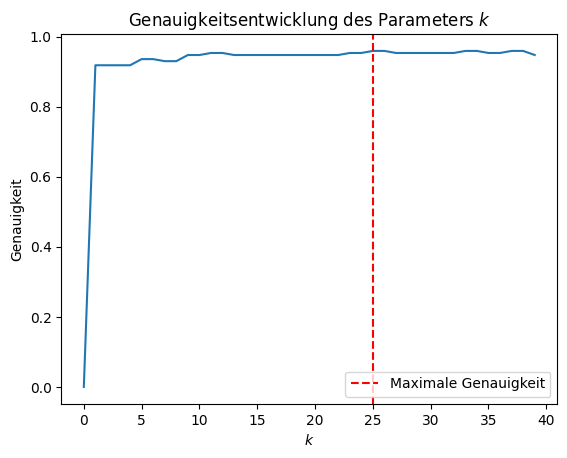

In [10]:
accuracies = []
for k in range(1, 40):
  knn = KNeighborsClassifier(k=k, p=2)
  knn.fit(X_train, y_train)
  predictions = []
  for i in range(len(X_test)):
    predictions.append(knn.predict(X_test[i]))

  accuracies.append(accuracy_score(y_test, predictions))

max_accuracy = max(accuracies)
max_accuracy_k = accuracies.index(max_accuracy) + 1
# k = index + 1
print(f"k={max_accuracy_k} => {max_accuracy}")

plt.plot([0, *accuracies])
plt.xlabel("$k$")
plt.ylabel("Genauigkeit")
plt.title("Genauigkeitsentwicklung des Parameters $k$")
plt.axvline(x=max_accuracy_k, color='red', linestyle='--', label='Maximale Genauigkeit')
plt.legend()
plt.show()

## 7. Finale Version des maschinelles $k$-NN Lernmodells

In [11]:
knn = KNeighborsClassifier(k=25, p=2)
knn.fit(X_train, y_train)
predictions = []
for i in range(len(X_test)):
  predictions.append(knn.predict(X_test[i]))

print(f"Genauigkeit={accuracy_score(y_test, predictions)}")

Genauigkeit=0.9590643274853801
